In [4]:
# Import libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
import warnings
warnings.filterwarnings("ignore")


In [5]:
#obtenemos los datos con la libreria de yfinance
sp500= yf.Ticker("^GSPC").history( period = "10y")

In [6]:
sp500 = sp500.drop( columns= ["Dividends" , 'Stock Splits'] )



In [15]:
sp500['Date '] = sp500.index
sp500['Date '] = pd.to_datetime(sp500['Date ']).dt.strftime('%Y-%m-%d')

In [16]:
sp500

,Open,High,Low,Close,Volume,Date
Date,,,,,,
2014-08-18 00:00:00-04:00,1958.359985,1971.989990,1958.359985,1971.739990,2638160000,2014-08-18
2014-08-19 00:00:00-04:00,1972.729980,1982.569946,1972.729980,1981.599976,2656430000,2014-08-19
2014-08-20 00:00:00-04:00,1980.459961,1988.569946,1977.680054,1986.510010,2579560000,2014-08-20
2014-08-21 00:00:00-04:00,1986.819946,1994.760010,1986.819946,1992.369995,2638920000,2014-08-21
2014-08-22 00:00:00-04:00,1992.599976,1993.540039,1984.760010,1988.400024,2301860000,2014-08-22
...,...,...,...,...,...,...
2024-08-12 00:00:00-04:00,5351.879883,5371.200195,5324.370117,5344.390137,3360160000,2024-08-12
2024-08-13 00:00:00-04:00,5376.979980,5436.500000,5376.979980,5434.430176,3648980000,2024-08-13
2024-08-14 00:00:00-04:00,5442.359863,5463.220215,5415.910156,5455.209961,3380050000,2024-08-14


# Graficos de lineas


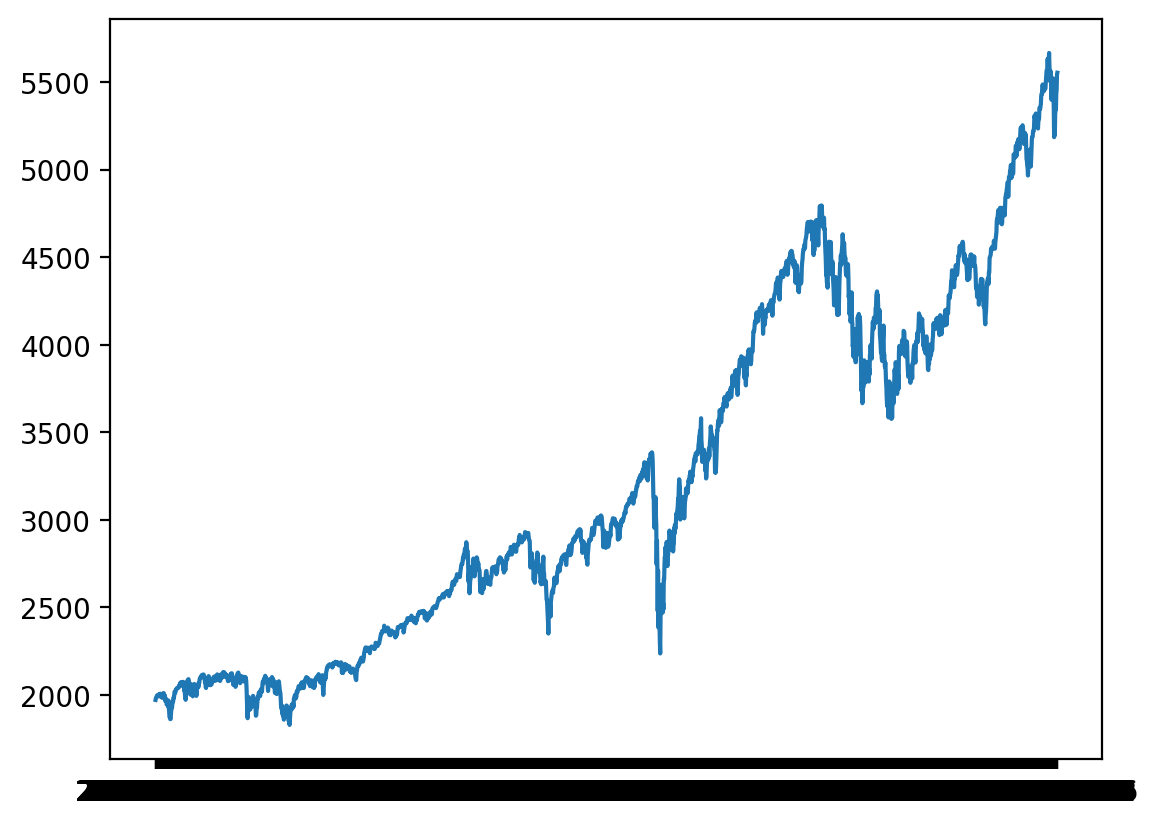

In [18]:
plt.plot(sp500["Date "], sp500["Close"])

In [ ]:
def get_candle_type(price):
  if price["Close"] > price["Open"] : return "bullish"
  if price["Close"] < price["Open"] : return "bearish"
  #if price["Close"] == price["Open"] : return "undefined"
  return "undefined"

def set_candle_type(row):
  type_ = row["Type"]
  if type_ is "bullish":
    return row["Delta"]
  if type_ is "bearish":
    return -row["Delta"]

  return None

df_candles = pd.DataFrame()
df_candles['Symbol'] = sp500['Symbol']
df_candles["Delta"] = sp500["High"] - sp500["Low"]
df_candles["Type"]  = sp500.apply(lambda row: get_candle_type(row), axis=1)
df_candles["Delta"] = df_candles.apply(lambda row: set_candle_type(row), axis=1)
df_candles.dropna(axis=1)
df_candles

In [ ]:
sp500 = pd.merge(sp500,df_candles, on='Symbol')

In [ ]:
sp500_data.shape

In [ ]:
lista = sp500_data['Symbol'].unique().tolist()

In [ ]:
print(lista)

In [ ]:
print(sp500_data.Symbol.unique)

In [ ]:
symbols = ['MMM', 'AOS', 'ABT', 'ABBV', 'ACN', 'ATVI', 'ADM', 'ADBE', 'ADP', 'AAP', 'AES', 'AFL', 'A', 'APD', 'AKAM', 'ALK', 'ALB', 'ARE', 'ALGN', 'ALLE', 'LNT', 'ALL', 'GOOGL', 'GOOG', 'MO', 'AMZN', 'AMCR', 'AMD', 'AEE', 'AAL', 'AEP', 'AXP', 'AIG', 'AMT', 'AWK', 'AMP', 'ABC', 'AME', 'AMGN', 'APH', 'ADI', 'ANSS', 'AON', 'APA', 'AAPL', 'AMAT', 'APTV', 'ACGL', 'ANET', 'AJG', 'AIZ', 'T', 'ATO', 'ADSK', 'AZO', 'AVB', 'AVY', 'BKR', 'BALL', 'BAC', 'BBWI', 'BAX', 'BDX', 'WRB', 'BBY', 'BIO', 'TECH', 'BIIB', 'BLK', 'BK', 'BA', 'BKNG', 'BWA', 'BXP', 'BSX', 'BMY', 'AVGO', 'BR', 'BRO', 'CHRW', 'CDNS', 'CZR', 'CPT', 'CPB', 'COF', 'CAH', 'KMX', 'CCL', 'CARR', 'CTLT', 'CAT', 'CBOE', 'CBRE', 'CDW', 'CE', 'CNC', 'CNP', 'CDAY', 'CF', 'CRL', 'SCHW', 'CHTR', 'CVX', 'CMG', 'CB', 'CHD', 'CI', 'CINF', 'CTAS', 'CSCO', 'C', 'CFG', 'CLX', 'CME', 'CMS', 'KO', 'CTSH', 'CL', 'CMCSA', 'CMA', 'CAG', 'COP', 'ED', 'STZ', 'CEG', 'COO', 'CPRT', 'GLW', 'CTVA', 'CSGP', 'COST', 'CTRA', 'CCI', 'CSX', 'CMI', 'CVS', 'DHI', 'DHR', 'DRI', 'DVA', 'DE', 'DAL', 'XRAY', 'DVN', 'DXCM', 'FANG', 'DLR', 'DFS', 'DISH', 'DIS', 'DG', 'DLTR', 'D', 'DPZ', 'DOV', 'DOW', 'DTE', 'DUK', 'DD', 'DXC', 'EMN', 'ETN', 'EBAY', 'ECL', 'EIX', 'EW', 'EA', 'ELV', 'LLY', 'EMR', 'ENPH', 'ETR', 'EOG', 'EPAM', 'EQT', 'EFX', 'EQIX', 'EQR', 'ESS', 'EL', 'ETSY', 'RE', 'EVRG', 'ES', 'EXC', 'EXPE', 'EXPD', 'EXR', 'XOM', 'FFIV', 'FDS', 'FAST', 'FRT', 'FDX', 'FITB', 'FRC', 'FSLR', 'FE', 'FIS', 'FISV', 'FLT', 'FMC', 'F', 'FTNT', 'FTV', 'FOXA', 'FOX', 'BEN', 'FCX', 'GRMN', 'IT', 'GEHC', 'GEN', 'GNRC', 'GD', 'GE', 'GIS', 'GM', 'GPC', 'GILD', 'GL', 'GPN', 'GS', 'HAL', 'HIG', 'HAS', 'HCA', 'PEAK', 'HSIC', 'HSY', 'HES', 'HPE', 'HLT', 'HOLX', 'HD', 'HON', 'HRL', 'HST', 'HWM', 'HPQ', 'HUM', 'HBAN', 'HII', 'IBM', 'IEX', 'IDXX', 'ITW', 'ILMN', 'INCY', 'IR', 'INTC', 'ICE', 'IFF', 'IP', 'IPG', 'INTU', 'ISRG', 'IVZ', 'INVH', 'IQV', 'IRM', 'JBHT', 'JKHY', 'J', 'JNJ', 'JCI', 'JPM', 'JNPR', 'K', 'KDP', 'KEY', 'KEYS', 'KMB', 'KIM', 'KMI', 'KLAC', 'KHC', 'KR', 'LHX', 'LH', 'LRCX', 'LW', 'LVS', 'LDOS', 'LEN', 'LNC', 'LIN', 'LYV', 'LKQ', 'LMT', 'L', 'LOW', 'LUMN', 'LYB', 'MTB', 'MRO', 'MPC', 'MKTX', 'MAR', 'MMC', 'MLM', 'MAS', 'MA', 'MTCH', 'MKC', 'MCD', 'MCK', 'MDT', 'MRK', 'META', 'MET', 'MTD', 'MGM', 'MCHP', 'MU', 'MSFT', 'MAA', 'MRNA', 'MHK', 'MOH', 'TAP', 'MDLZ', 'MPWR', 'MNST', 'MCO', 'MS', 'MOS', 'MSI', 'MSCI', 'NDAQ', 'NTAP', 'NFLX', 'NWL', 'NEM', 'NWSA', 'NWS', 'NEE', 'NKE', 'NI', 'NDSN', 'NSC', 'NTRS', 'NOC', 'NCLH', 'NRG', 'NUE', 'NVDA', 'NVR', 'NXPI', 'ORLY', 'OXY', 'ODFL', 'OMC', 'ON', 'OKE', 'ORCL', 'OGN', 'OTIS', 'PCAR', 'PKG', 'PARA', 'PH', 'PAYX', 'PAYC', 'PYPL', 'PNR', 'PEP', 'PKI', 'PFE', 'PCG', 'PM', 'PSX', 'PNW', 'PXD', 'PNC', 'POOL', 'PPG', 'PPL', 'PFG', 'PG', 'PGR', 'PLD', 'PRU', 'PEG', 'PTC', 'PSA', 'PHM', 'QRVO', 'PWR', 'QCOM', 'DGX', 'RL', 'RJF', 'RTX', 'O', 'REG', 'REGN', 'RF', 'RSG', 'RMD', 'RHI', 'ROK', 'ROL', 'ROP', 'ROST', 'RCL', 'SPGI', 'CRM', 'SBAC', 'SLB', 'STX', 'SEE', 'SRE', 'NOW', 'SHW', 'SBNY', 'SPG', 'SWKS', 'SJM', 'SNA', 'SEDG', 'SO', 'LUV', 'SWK', 'SBUX', 'STT', 'STLD', 'STE', 'SYK', 'SIVB', 'SYF', 'SNPS', 'SYY', 'TMUS', 'TROW', 'TTWO', 'TPR', 'TRGP', 'TGT', 'TEL', 'TDY', 'TFX', 'TER', 'TSLA', 'TXN', 'TXT', 'TMO', 'TJX', 'TSCO', 'TT', 'TDG', 'TRV', 'TRMB', 'TFC', 'TYL', 'TSN', 'USB', 'UDR', 'ULTA', 'UNP', 'UAL', 'UPS', 'URI', 'UNH', 'UHS', 'VLO', 'VTR', 'VRSN', 'VRSK', 'VZ', 'VRTX', 'VFC', 'VTRS', 'VICI', 'V', 'VMC', 'WAB', 'WBA', 'WMT', 'WBD', 'WM', 'WAT', 'WEC', 'WFC', 'WELL', 'WST', 'WDC', 'WRK', 'WY', 'WHR', 'WMB', 'WTW', 'GWW', 'WYNN', 'XEL', 'XYL', 'YUM', 'ZBRA', 'ZBH', 'ZION', 'ZTS']


In [ ]:
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"


In [ ]:
# Usar la función read_html() para leer la tabla desde la página web
tables = pd.read_html(url)

In [ ]:
# La tabla que nos interesa es la primera
sp500_table = tables[0]

In [ ]:
# Imprimir los primeros cinco registros del DataFrame
sp500_table.head()

In [ ]:
lista2 = sp500_data['Symbol'].unique().tolist()

In [ ]:
print(len(lista2))

In [ ]:
sp500_data.head()

In [ ]:
# Fusionar los dataframes en función de la columna CustomerID
merged_df = pd.merge(sp500_data, sp500_table, on='Symbol')



In [ ]:
merged_df.head()

In [ ]:
merged_df.shape

In [ ]:
# Establecer el rango de fechas
start_date = '2000-01-01'
end_date = '2023-02-22'

# Obtener los datos utilizando la biblioteca yfinance
ticker = "^GSPC"  # el símbolo de Yahoo Finance para el índice S&P500
dataglobal = yf.download(ticker, start=start_date, end=end_date)


In [ ]:
dataglobal.head()

In [ ]:
merged_df.info()

In [ ]:
# Agregar una columna con el día de la semana correspondiente
dias_de_la_semana = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}
merged_df['Dia'] = merged_df['Date'].dt.dayofweek.map(dias_de_la_semana)

In [ ]:
merged_df.tail()

In [ ]:
merged_df.to_parquet('sp500.parquet')

In [ ]:
df= pd.read_parquet('sp500.parquet')

In [ ]:
grupos = df.groupby('GICS Sector')

# iterar sobre los grupos y guardar cada uno en un archivo CSV separado
for nombre, grupo in grupos:
    archivo_salida = nombre + '.csv'
    grupo.to_csv(archivo_salida, index=False)

In [ ]:
df_tech = df.loc[df['GICS Sector'] == 'Information Technology']


In [ ]:
df_tech.head()

In [ ]:
def get_candle_type(price):
  if price["Close"] > price["Open"] : return "bullish"
  if price["Close"] < price["Open"] : return "bearish"
  #if price["Close"] == price["Open"] : return "undefined"
  return "undefined"

def set_candle_type(row):
  type_ = row["Type"]
  if type_ is "bullish":
    return row["Delta"]
  if type_ is "bearish":
    return -row["Delta"]

  return None

df_candles = pd.DataFrame()
df_candles["Delta"] = df["High"] - df["Low"]
df_candles["Type"]  = df.apply(lambda row: get_candle_type(row), axis=1)
df_candles["Delta"] = df_candles.apply(lambda row: set_candle_type(row), axis=1)
df_candles.dropna(axis=1)
df_candles

In [ ]:

df_prices = df_tech.loc[df_tech['Date'] > '2000-01-01', ['Date', 'Close']]


# Agrupación de los datos por períodos de 3 años
df_prices = df_prices.set_index('Date').resample('2Y').last().reset_index()

# Gráfico de línea de los precios de cierre de las acciones
plt.figure(figsize=(12,8))  # Tamaño de la figura
plt.plot(df_prices['Date'], df_prices['Close'])
plt.title('Precios de cierre de las acciones de empresas de tecnología de la información (por períodos de 2 años)')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selección de las empresas de tecnología de la información en el S&P 500
df_tech = df.loc[df['GICS Sector'] == 'Information Technology']

# Selección de los precios de cierre de las acciones de las empresas de tecnología de la información después del año 2000
symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'FB']
df_prices = df_tech.loc[df_tech['Symbol'].isin(symbols) & (df_tech['Date'] > '2000-01-01'), ['Symbol', 'Date', 'Close']]

# Reorganizar los datos para tener los precios de cierre como columnas y las fechas como índices
df_prices = df_prices.pivot(index='Date', columns='Symbol', values='Close')
# Gráfico de matriz de correlación
plt.figure(figsize=(12, 8))
g = sns.PairGrid(df_prices, diag_sharey=False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)
g.map_diag(sns.histplot)

# Ajustar márgenes
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.9, hspace=0.5, wspace=0.5)

# Limitar la distribución a dos años
g.set(xlim=('2000-01-01', '2002-12-31'), ylim=('2000-01-01', '2002-12-31'))

# Limitar la distribución de las diagonales a dos años
symbols = df_prices.columns.values
for i in range(len(symbols)):
    g.axes[i, i].set_xlim(['2000-01-01', '2002-12-31'])

# Mostrar gráfico
plt.show()




In [ ]:
# Selección de las empresas de tecnología de la información en el S&P 500
df_tech = df.loc[df['GICS Sector'] == 'Information Technology']
# Crear lista con los símbolos de las empresas de tecnología de la información
tech_symbols = ['MSFT', 'AMD']

# Selección de las empresas de tecnología de la información en el S&P 500
df_tech = df.loc[(df['GICS Sector'] == 'Information Technology') & (df['Symbol'].isin(tech_symbols))]

# Selección de los precios de cierre de las acciones de las empresas de tecnología de la información después del año 2000
df_prices = df_tech.pivot(index='Date', columns='Symbol', values='Close').loc['2000':]

# Eliminación de la primera fila que contiene NaN
df_returns = df_returns.dropna()



# Gráfico de matriz de correlación
sns.histplot(data=df_prices, bins=50,kde=True )
plt.show()

# Gráfico de distribución de la rentabilidad
plt.figure(figsize=(12, 8))
sns.histplot(data=df_returns, bins=50, kde=True)
plt.title('Distribución de la rentabilidad diaria de las acciones de empresas de tecnología de la información (2000-2021)')
plt.xlabel('Rentabilidad diaria')
plt.ylabel('Frecuencia')
plt.xlim(-0.2, 0.2)
plt.show()



In [ ]:

plt.subplots(figsize=(12, 4))
sns.lineplot(data=df_tech, x=df_tech['Date'], y='Close')
plt.show()